Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1002 images belonging to 2 classes.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 528us/step - loss: 0.5889 - acc: 0.6755 - val_loss: 0.4137 - val_acc: 0.8430
Epoch 2/30
2000/2000 [==============================] - 1s 325us/step - loss: 0.4430 - acc: 0.7870 - val_loss: 0.3438 - val_acc: 0.8710
Epoch 3/30
2000/2000 [==============================] - 1s 293us/step - loss: 0.3481 - acc: 0.8555 - val_loss: 0.3051 - val_acc: 0.8760
Epoch 4/30
2000/2000 [==============================] - 1s 294us/step - los

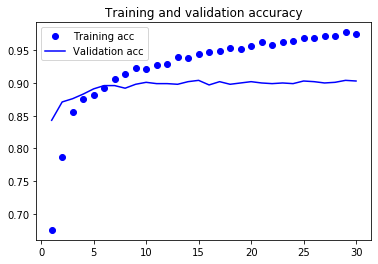

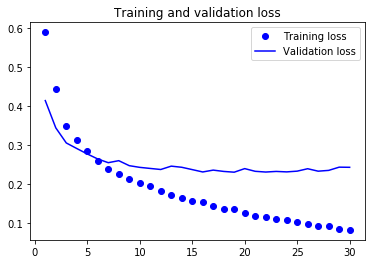

In [3]:
from keras.applications import VGG16
from google.colab import drive
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os,shutil


drive.mount('/content/drive')
original_dataset_dir = '/content/drive/My Drive/Dogs-vs-cats classification/train'

base_dir = '/content/drive/My Drive/Dogs-vs-cats classification/cats_and_dogs_small'

train_dir = '/content/drive/My Drive/Dogs-vs-cats classification/cats_and_dogs_small/train'

validation_dir = '/content/drive/My Drive/Dogs-vs-cats classification/cats_and_dogs_small/validation'

test_dir = '/content/drive/My Drive/Dogs-vs-cats classification/cats_and_dogs_small/test'

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))#include_top corresponds to the densely connected layer.

def extract_features(directory):
  generator = datagen.flow_from_directory(directory,target_size=(150, 150),batch_size=batch_size,class_mode='binary')
  sample_count = generator.samples
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i = i + 1
    if i * batch_size >= sample_count:
      break
  return features, labels, sample_count

train_features, train_labels, train_samples = extract_features(train_dir)
validation_features, validation_labels, validation_samples = extract_features(validation_dir)
test_features, test_labels, test_samples = extract_features(test_dir)
train_features = np.reshape(train_features, (train_samples, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (validation_samples, 4 * 4 * 512))
test_features = np.reshape(test_features, (test_samples, 4 * 4 * 512))

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(train_features, train_labels,epochs=30,batch_size=20,validation_data=(validation_features, validation_labels))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()